In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
digits = load_digits() #load the dataset in digits


In [14]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [16]:
digits.data[:]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [17]:
k_mean=KMeans(n_clusters=10,random_state=0)

In [18]:
y_mean=k_mean.fit_predict(digits.data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
y_mean

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

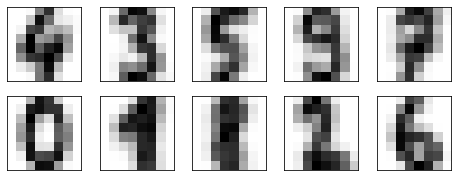

In [20]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of␣
#,→subplots( 2 rows and 5 columns)
centers = k_mean.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to␣
#,→original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8␣
#,→matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣
##,→plotting relevant centers
       axi.set(xticks = [], yticks = [])
       axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
##0,→#imshow(matplotlib method) to render the image in notebook

In [21]:
labels = np.zeros_like(y_mean) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
     mask = (y_mean == i)
#if a specific digit belongs to/equivalent a specific cluster then its True␣
#,→else False
     print(mask)
     labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


<ipython-input-21-994e52fe5b00>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [22]:
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 79.35%
